# Final Classifier for Music

## Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score

from scipy.io import arff

## Data Loading

In [30]:
def loadJSON(path):
    with open(path, 'r') as f:
        return json.load(f)

train_data_path = r'data/music_train_set.csv'
val_data_path = r'data/music_validation_set.csv'
feature_path = r'data/music_selected_features.txt'
print("Start Program")
dataset_train = pd.read_csv(train_data_path)
print("Loaded training set")
dataset_val = pd.read_csv(val_data_path)
print("Loaded validation set")
features = loadJSON(featurePath)
print("Loaded features")

X_train = dataset_train[features].values
y_train = np.array(dataset_train.iloc[:, -1])

X_val = dataset_val[features].values
y_val = np.array(dataset_val.iloc[:, -1])

dataset_train[features].head()

Start Program
Loaded training set
Loaded validation set
Loaded features


,f000051,f000059,f000063,f000071,f000072,f000081,f000082,f000087,f000092,f000093,...,f000449,f000452,f000465,f000466,f000477,f000480,f000481,f000507,f000704,f000705
0,0.08,0.19,0.14,0.11,0.16,0.05,0.06,0.16,0.12,0.14,...,0.01,-0.01,0.05,-0.05,-0.02,-0.01,0.01,0.0,291.053,1.69815
1,0.08,0.19,0.14,0.11,0.16,0.05,0.06,0.16,0.12,0.14,...,0.01,-0.01,0.05,-0.05,-0.02,-0.01,0.01,0.0,291.053,1.69815
2,0.08,0.19,0.14,0.11,0.16,0.05,0.06,0.16,0.12,0.14,...,0.01,-0.01,0.05,-0.05,-0.02,-0.01,0.01,0.0,291.053,1.69815
3,0.08,0.19,0.14,0.11,0.16,0.05,0.06,0.16,0.12,0.14,...,0.01,-0.01,0.05,-0.05,-0.02,-0.01,0.01,0.0,291.053,1.69815
4,0.08,0.19,0.14,0.11,0.16,0.05,0.06,0.16,0.12,0.14,...,0.01,-0.01,0.05,-0.05,-0.02,-0.01,0.01,0.0,291.053,1.69815


In [31]:
def plotROC(solution, prediction, classifierName):
    lw = 2
    fpr, tpr, _ = roc_curve(solution, prediction)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for {}'.format(classifierName))
    plt.legend()
    plt.show()

## Train Logistic Regression

0.8119670989478439


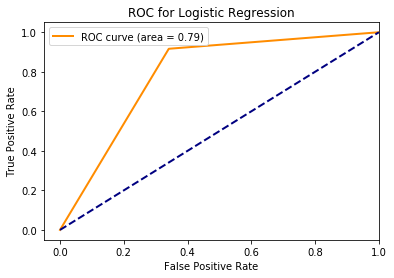

In [34]:
from sklearn.metrics import accuracy_score
logistic_regression = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                                         intercept_scaling=1, max_iter=100, multi_class='warn',
                                         n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
                                         tol=0.0001, verbose=0, warm_start=False)

logistic_regression.fit(X_train, y_train)
lr_pred = logistic_regression.predict(X_val)
print(accuracy_score(y_val, lr_pred))
plotROC(y_val, lr_pred, "Logistic Regression")

## Train Random Forest

In [ ]:
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                                       max_depth=1000, max_features='auto', max_leaf_nodes=None,
                                       min_impurity_decrease=0.0, min_impurity_split=None,
                                       min_samples_leaf=2, min_samples_split=6,
                                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                                       oob_score=False, random_state=0, verbose=0, warm_start=False)

## Train Neural Network

In [ ]:
nn = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
                   beta_2=0.999, early_stopping=False, epsilon=1e-08,
                   hidden_layer_sizes=100, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=200, momentum=0.9,
                   n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
                   random_state=0, shuffle=True, solver='adam', tol=0.0001,
                   validation_fraction=0.1, verbose=False, warm_start=False)